Epoch 0, Loss: 0.2331995318280181, Validation Accuracy: 89.05999999999999%
Epoch 1, Loss: 0.17460634248048973, Validation Accuracy: 91.29%
Epoch 2, Loss: 0.14414413019687314, Validation Accuracy: 91.99000000000001%
Epoch 3, Loss: 0.1265738267807629, Validation Accuracy: 92.53%
Epoch 4, Loss: 0.11674660807682144, Validation Accuracy: 93.08%
Epoch 5, Loss: 0.11088020142660296, Validation Accuracy: 93.36%
Epoch 6, Loss: 0.10704251492935606, Validation Accuracy: 93.56%
Epoch 7, Loss: 0.10435772262355045, Validation Accuracy: 93.86%
Epoch 8, Loss: 0.10235750549111616, Validation Accuracy: 94.03%
Epoch 9, Loss: 0.10070800399851454, Validation Accuracy: 94.16%
Epoch 10, Loss: 0.09922355057382438, Validation Accuracy: 94.41000000000001%
Epoch 11, Loss: 0.09784200464999906, Validation Accuracy: 94.46%
Epoch 12, Loss: 0.0965616861309807, Validation Accuracy: 94.58%
Epoch 13, Loss: 0.09539480303117844, Validation Accuracy: 94.66%
Epoch 14, Loss: 0.09434989773271958, Validation Accuracy: 94.78%
Ep

Epoch 122, Loss: 0.04107780508917137, Validation Accuracy: 96.45%
Epoch 123, Loss: 0.04090965354398393, Validation Accuracy: 96.45%
Epoch 124, Loss: 0.04074554911859486, Validation Accuracy: 96.44%
Epoch 125, Loss: 0.04058548296191837, Validation Accuracy: 96.43%
Epoch 126, Loss: 0.04042943545890738, Validation Accuracy: 96.44%
Epoch 127, Loss: 0.04027738039071633, Validation Accuracy: 96.44%
Epoch 128, Loss: 0.04012929035616983, Validation Accuracy: 96.46000000000001%
Epoch 129, Loss: 0.03998514202214249, Validation Accuracy: 96.45%
Epoch 130, Loss: 0.03984491991853453, Validation Accuracy: 96.46000000000001%
Epoch 131, Loss: 0.0397086178665527, Validation Accuracy: 96.46000000000001%
Epoch 132, Loss: 0.039576237618591026, Validation Accuracy: 96.47%
Epoch 133, Loss: 0.039447784788201365, Validation Accuracy: 96.46000000000001%
Epoch 134, Loss: 0.039323262585433096, Validation Accuracy: 96.46000000000001%
Epoch 135, Loss: 0.039202664203812146, Validation Accuracy: 96.48%
Epoch 136, Lo

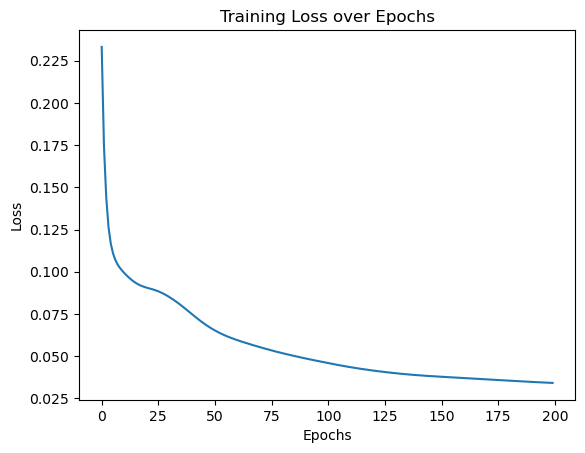

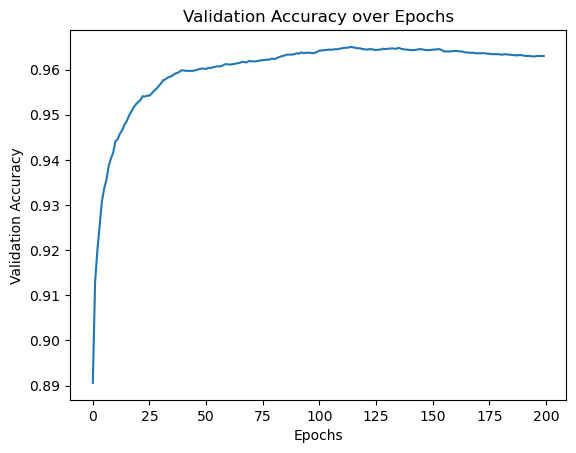

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import gzip
import pickle


class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size 
        self.output_size = output_size
        
        # Initialize weights and biases for the input layer, hidden layer, and output layer
       # 随机缩放初始化
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size) / np.sqrt(self.input_size)       
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size) / np.sqrt(self.hidden_size)
        self.bias_output = np.zeros((1, self.output_size))
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x): 
        return x * (1 - x)
    
    def forward(self, x):
        # Forward pass
        self.hidden_input = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = self.sigmoid(self.output_input)
        return self.final_output
    
   # def train(self, x, y, learning_rate, epochs, mini_batch_size): #SGD
    def train(self, x, y, val_images, val_labels, learning_rate, epochs, mini_batch_size): #SGD
        self.losses = []  # Initialize the losses list
        self.accuracies = []  # Initialize the accuracies list
        for epoch in range(epochs):
            for i in range(0, len(x), mini_batch_size):
                mini_batch_X = x[i:i+mini_batch_size]
                mini_batch_Y = y[i:i+mini_batch_size]
                
                # Forward pass
                self.forward(mini_batch_X)
                
                # Calculate loss (squared error)
                #loss = np.var(mini_batch_Y - self.final_output)
                loss = (1 / (2 * len(mini_batch_X))) * np.sum(np.linalg.norm(self.final_output - mini_batch_Y, axis=1) ** 2)
                
                # Backpropagation
                output_error = mini_batch_Y - self.final_output
                output_delta = output_error * self.sigmoid_derivative(self.final_output)            
                hidden_error = output_delta.dot(self.weights_hidden_output.T)
                hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)
                
                # Update weights and biases
                self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * learning_rate
                self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
                self.weights_input_hidden += mini_batch_X.T.dot(hidden_delta) * learning_rate
                self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate
                
        # Calculate validation accuracy at the end of each epoch
            val_predictions = self.predict(val_images)
            val_accuracy = np.mean(np.argmax(val_predictions, axis=1) == np.argmax(val_labels, axis=1))
            self.accuracies.append(val_accuracy)
            
            print(f"Epoch {epoch}, Loss: {loss}, Validation Accuracy: {val_accuracy*100}%")
            self.losses.append(loss)           
                
        
    def predict(self, x):
        return self.forward(x)



def load_mnist(filename):
    with gzip.open(filename, 'rb') as f:
        data = pickle.load(f, encoding='latin1')
    return data


def one_hot_encode(labels, num_classes=10):
    encoded = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        encoded[i, label] = 1
    return encoded

def main():
    # Load MNIST data
    train_data, val_data, test_data = load_mnist('mnist.pkl.gz')

    train_images, train_labels_raw = train_data
    val_images, val_labels_raw = val_data
    test_images, test_labels_raw = test_data
    
    train_labels = one_hot_encode(train_labels_raw)
    val_labels = one_hot_encode(val_labels_raw)
    test_labels = one_hot_encode(test_labels_raw)

    def add_input_bias(X):
        bias = np.zeros((X.shape[0], 1))
        return np.hstack((X, bias))
    
    train_images = add_input_bias(train_images)
    val_images = add_input_bias(val_images)
    test_images = add_input_bias(test_images)
    # Define the neural network architecture

    input_size = 784 + 1
    hidden_size = 30 + 1
    output_size = 10
    
    # Create a neural network
    nn = NeuralNetwork(input_size, hidden_size, output_size)
    
    # Train the neural network

    nn.train(train_images, train_labels, val_images, val_labels, learning_rate=0.01, epochs=200, mini_batch_size=32)
    # Test the neural network
    predictions = nn.predict(test_images)
    
    # Calculate accuracy
    accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(test_labels, axis=1))
    
    print(f"Accuracy: {accuracy * 100}%")
    
    # Plot the training loss
    plt.plot(nn.losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.show()
    # Plot the training accuracy
    plt.plot(nn.accuracies)
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.title('Validation Accuracy over Epochs')
    plt.show()
    
if __name__ == "__main__":
    main()